In [19]:
from model_data import Model, pd, np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [20]:
model = Model()

CARGA LOS MODELOS ENTRENADOS

In [21]:
dtc_model = model.load_model('dtc_model')
rf_model = model.load_model('rf_model')
svm_model = model.load_model('svm_model')
svm_model_lineal = model.load_model('svm_model_lineal')
svm_model_polinomial = model.load_model('svm_model_polinomial')
model_block = model.load_model_nn('model_block')
model_block_history = model.load_model('model_block_history')

In [22]:
def cm(modelo):
    y_test_labeled = model.y_test.map(model.genres)
    y_pred = modelo.predict(model.X_test)
    y_pred_labeled = pd.Series(y_pred).map(model.genres)
    cm = confusion_matrix(y_test_labeled, y_pred_labeled)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.genres.values())
    disp.plot()
    plt.title(modelo)
    plt.xticks(rotation=90)
    plt.show()

def cm_bloques(modelo):
    predictions = modelo.predict(model.X_test_t)
    predictions = np.argmax(predictions, axis=1)
    real_y = np.argmax(model.y_test_t, axis=1)
    cm = confusion_matrix(real_y, predictions,)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.genres.values())
    disp.plot()
    plt.title(f'Modelo {modelo.name}')
    plt.xticks(rotation=90)
    plt.show()

def graficos(model_fit):
    #grafico perdida vs epoch 
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['loss'])
    plt.plot(model_fit.epoch, model_fit.history['val_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Entrenamiento")
    plt.legend(['loss', 'val_loss'])
    plt.show()

    #Grafico accuracy vs val_accuracy
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['accuracy'])
    plt.plot(model_fit.epoch, model_fit.history['val_accuracy'])
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.title("Entrenamiento")
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()

def mostrar_metricas(y_pred):
    y_test_labeled = model.y_test.map(model.genres)
    y_pred_labeled = pd.Series(y_pred).map(model.genres)

    classification_metrics_labeled = classification_report(y_test_labeled, y_pred_labeled, output_dict=True)
    classification_metrics_labeled_df = pd.DataFrame(classification_metrics_labeled).transpose()
    return classification_metrics_labeled_df


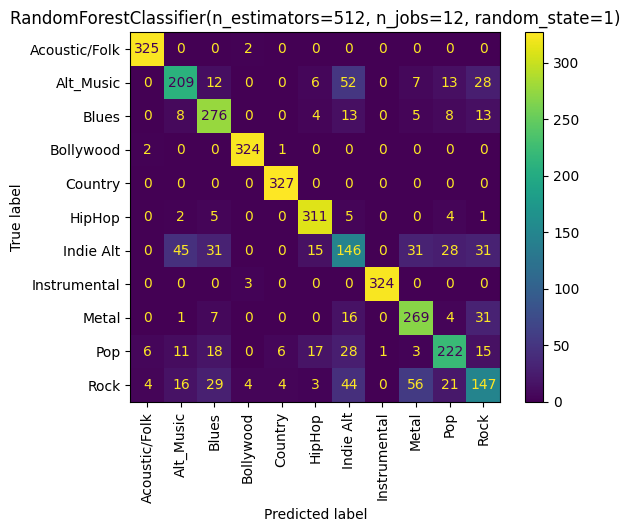

,precision,recall,f1-score,support
Acoustic/Folk,0.964392,0.993884,0.978916,327.0
Alt_Music,0.715753,0.639144,0.675283,327.0
Blues,0.730159,0.844037,0.782979,327.0
Bollywood,0.972973,0.990826,0.981818,327.0
Country,0.967456,1.000000,0.983459,327.0
HipHop,0.873596,0.948171,0.909357,328.0
Indie Alt,0.480263,0.446483,0.462758,327.0
Instrumental,0.996923,0.990826,0.993865,327.0
Metal,0.725067,0.820122,0.769671,328.0
Pop,0.740000,0.678899,0.708134,327.0


In [23]:
cm(rf_model)
mostrar_metricas(rf_model.predict(model.X_test))

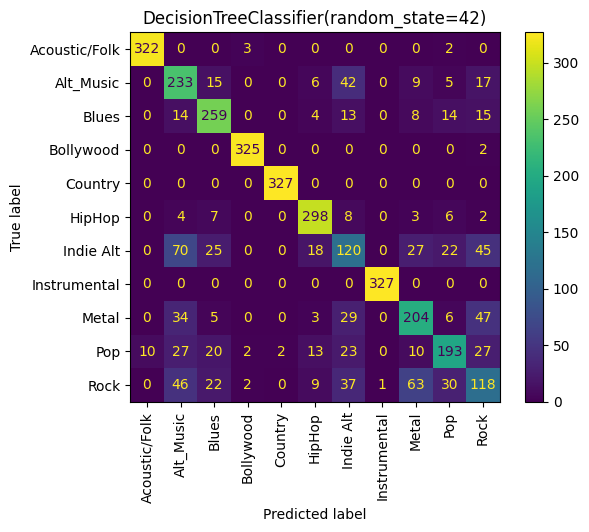

,precision,recall,f1-score,support
Acoustic/Folk,0.969880,0.984709,0.977238,327.000000
Alt_Music,0.544393,0.712538,0.617219,327.000000
Blues,0.733711,0.792049,0.761765,327.000000
Bollywood,0.978916,0.993884,0.986343,327.000000
Country,0.993921,1.000000,0.996951,327.000000
HipHop,0.849003,0.908537,0.877761,328.000000
Indie Alt,0.441176,0.366972,0.400668,327.000000
Instrumental,0.996951,1.000000,0.998473,327.000000
Metal,0.629630,0.621951,0.625767,328.000000
Pop,0.694245,0.590214,0.638017,327.000000


In [24]:
cm(dtc_model)
mostrar_metricas(dtc_model.predict(model.X_test))

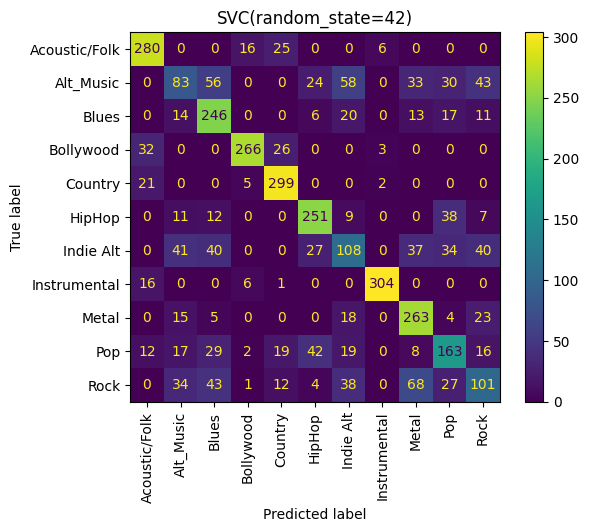

,precision,recall,f1-score,support
Acoustic/Folk,0.775623,0.856269,0.813953,327.000000
Alt_Music,0.386047,0.253823,0.306273,327.000000
Blues,0.570766,0.752294,0.649077,327.000000
Bollywood,0.898649,0.813456,0.853933,327.000000
Country,0.782723,0.914373,0.843441,327.000000
HipHop,0.709040,0.765244,0.736070,328.000000
Indie Alt,0.400000,0.330275,0.361809,327.000000
Instrumental,0.965079,0.929664,0.947040,327.000000
Metal,0.623223,0.801829,0.701333,328.000000
Pop,0.520767,0.498471,0.509375,327.000000


In [25]:
cm(svm_model)
mostrar_metricas(svm_model.predict(model.X_test))

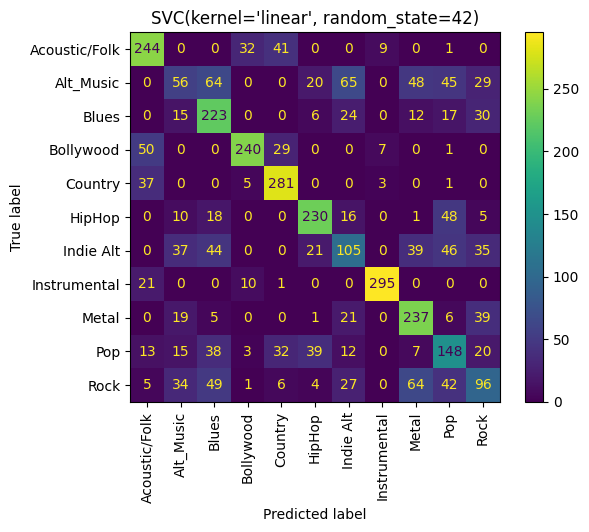

,precision,recall,f1-score,support
Acoustic/Folk,0.659459,0.746177,0.700143,327.000000
Alt_Music,0.301075,0.171254,0.218324,327.000000
Blues,0.505669,0.681957,0.580729,327.000000
Bollywood,0.824742,0.733945,0.776699,327.000000
Country,0.720513,0.859327,0.783821,327.000000
HipHop,0.716511,0.701220,0.708783,328.000000
Indie Alt,0.388889,0.321101,0.351759,327.000000
Instrumental,0.939490,0.902141,0.920437,327.000000
Metal,0.580882,0.722561,0.644022,328.000000
Pop,0.416901,0.452599,0.434018,327.000000


In [26]:
cm(svm_model_lineal)
mostrar_metricas(svm_model_lineal.predict(model.X_test))

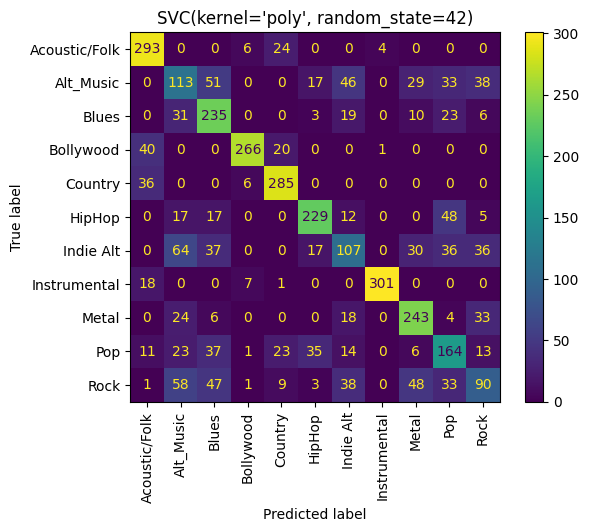

,precision,recall,f1-score,support
Acoustic/Folk,0.734336,0.896024,0.807163,327.000000
Alt_Music,0.342424,0.345566,0.343988,327.000000
Blues,0.546512,0.718654,0.620872,327.000000
Bollywood,0.926829,0.813456,0.866450,327.000000
Country,0.787293,0.871560,0.827286,327.000000
HipHop,0.753289,0.698171,0.724684,328.000000
Indie Alt,0.421260,0.327217,0.368330,327.000000
Instrumental,0.983660,0.920489,0.951027,327.000000
Metal,0.663934,0.740854,0.700288,328.000000
Pop,0.480938,0.501529,0.491018,327.000000


In [27]:
cm(svm_model_polinomial)
mostrar_metricas(svm_model_polinomial.predict(model.X_test))

113/113 [==============================] - 0s 364us/step


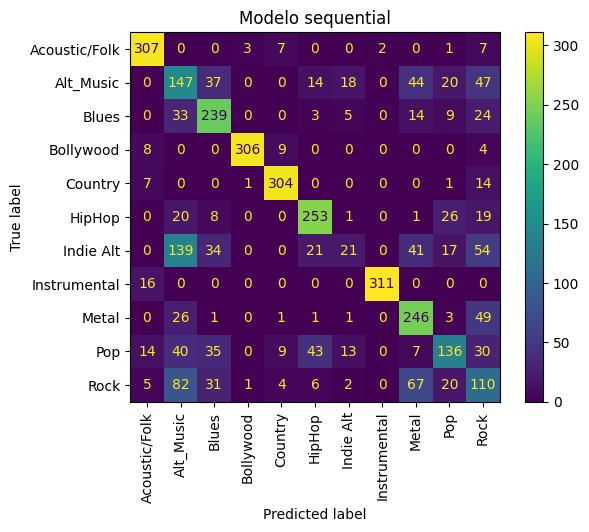

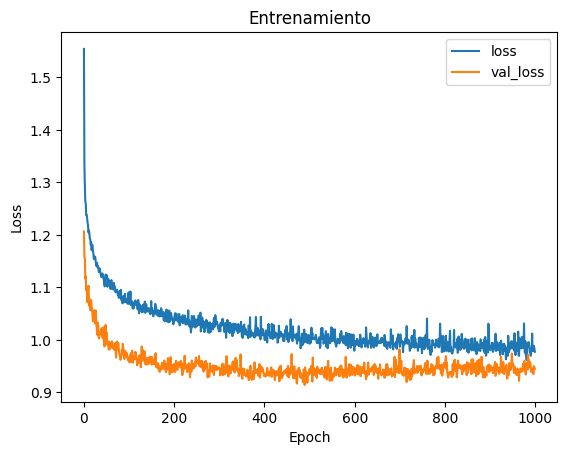

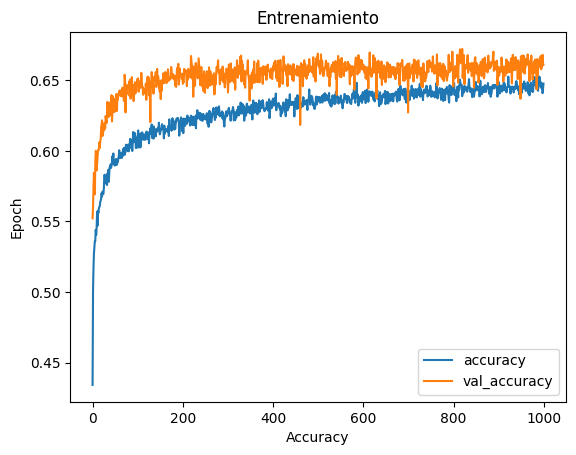

In [28]:
cm_bloques(model_block)
graficos(model_block_history)